In [1]:
import pandas as pd
import numpy as np
import re
import os
from datetime import datetime
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
import plotly.tools as tls
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
sns.set()

In [2]:
# pip install wordcloud
# pip install -U gensim

In [3]:
p = "YlGnBu"
p2 = "YlGn"
p3 = "Greys"

In [4]:
location = r'C:\Users\madhu\Downloads\Compressed\new-york-city-current-job-postings\nyc-jobs.csv'
df = pd.read_csv(location)
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
Job ID                           2946 non-null int64
Agency                           2946 non-null object
Posting Type                     2946 non-null object
# Of Positions                   2946 non-null int64
Business Title                   2946 non-null object
Civil Service Title              2946 non-null object
Title Code No                    2946 non-null object
Level                            2946 non-null object
Job Category                     2944 non-null object
Full-Time/Part-Time indicator    2751 non-null object
Salary Range From                2946 non-null float64
Salary Range To                  2946 non-null float64
Salary Frequency                 2946 non-null object
Work Location                    2946 non-null object
Division/Work Unit               2946 non-null object
Job Description                  2946 non-null object
Minimum Qual Requirements    

In [6]:
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     195
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          20
Preferred Skills                  393
Additional Information           1092
To Apply                            1
Hours/Shift                      2062
Work Location 1                  1588
Recruitment Contact              2946
Residency Requirement               4
Posting Date                        4
Post Until                       2075
Posting Upda

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Job ID,2946,NaN,NaN,NaN,384822,53075.3,87990,378497,404382,419974,426238
Agency,2946,52,DEPT OF ENVIRONMENT PROTECTION,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posting Type,2946,2,Internal,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# Of Positions,2946,NaN,NaN,NaN,2.49593,9.28131,1,1,1,1,200
Business Title,2946,1244,Assistant Civil Engineer,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civil Service Title,2946,312,COMMUNITY COORDINATOR,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title Code No,2946,323,56058,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Level,2946,14,0,1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Category,2944,130,"Engineering, Architecture, & Planning",504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Full-Time/Part-Time indicator,2751,2,F,2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Data cleaning and feature engineering
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color='white', 
                         width = 1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
def parse_categories(x):
    l = x.replace('&',',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_categories.extend(l)
    
def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)    
    
def preferred_skills(x):
    kwl = []
    df[df.job_category==x].preferred_skills.dropna().apply(parse_keywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

In [9]:
df.drop(['Recruitment Contact', 'Post Until'], axis=1, inplace=True)
df.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 
              'business_title', 'civil_service_title', 'title_code_number', 
              'level', 'job_category', 'full-time/part-time', 'salary_range_low',
              'salary_range_high', 'salary_frequency', 'work_location',
              'work_unit', 'job_description', 'minimum_requirements', 
              'preferred_skills', 'additional_info', 'to_apply', 'shift', 
              'work_location_1', 'residency_requirement', 'posting_date', 
              'posting_updated', 'process_date' ]

In [10]:
df.job_category.value_counts().head(20).reset_index()

,index,job_category
0,"Engineering, Architecture, & Planning",504
1,"Technology, Data & Innovation",313
2,Legal Affairs,226
3,"Public Safety, Inspections, & Enforcement",182
4,Building Operations & Maintenance,181
5,"Finance, Accounting, & Procurement",169
6,Administration & Human Resources,134
7,Constituent Services & Community Programs,129
8,Health,125
9,"Policy, Research & Analysis",124


In [18]:
key_categories = []
df.job_category.dropna().apply(parse_categories)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
popular_categories = key_categories.value_counts().iloc[:25]

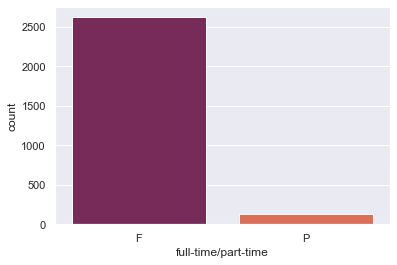

In [19]:
# Nature of Job
sns.countplot(x='full-time/part-time', data=df, palette='rocket')

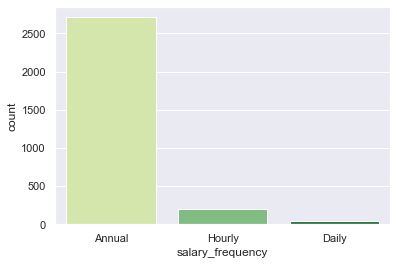

In [21]:
# Salary Frequency
sns.countplot(x='salary_frequency', data=df, palette=p2)

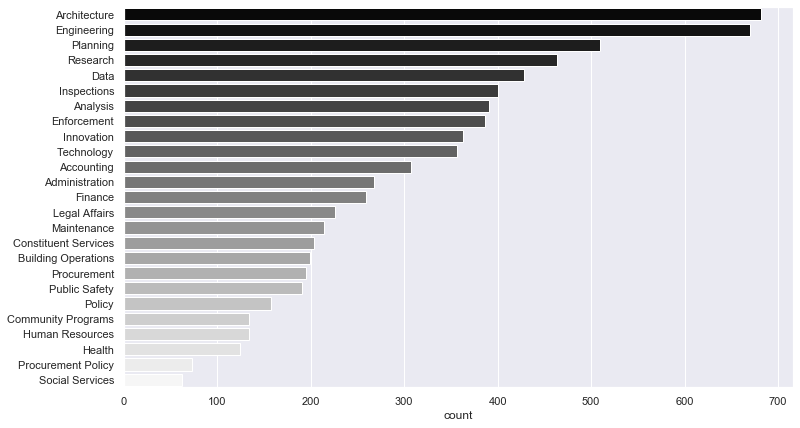

In [32]:
# Most in demand job categiries
plt.figure(figsize=(12,7))
sns.countplot(y=key_categories, order=popular_categories.index, palette='gist_gray')

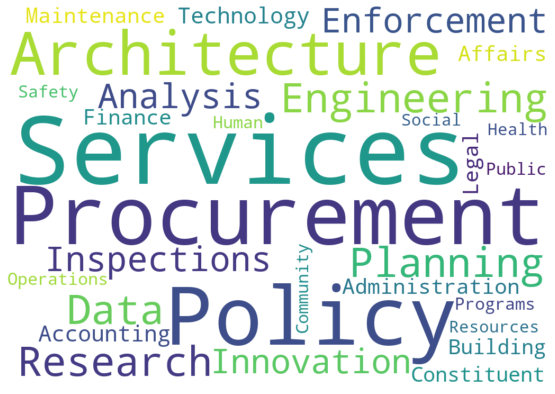

In [33]:
# Popular categories wordcloud
plt.figure(figsize=(12,7))
plot_wordcloud(' '.join(popular_categories.index.tolist()))

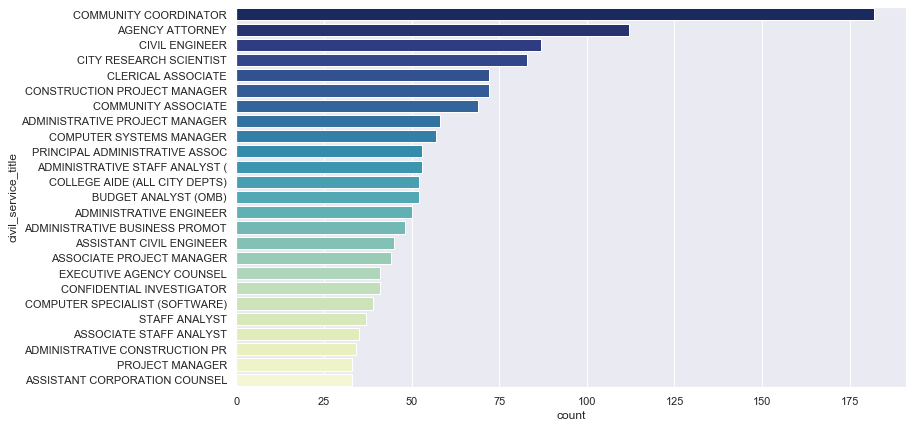

In [36]:
# Most poular job titles
plt.figure(figsize=(12,7))
titles_freq = df.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:25]
sns.countplot(y='civil_service_title', data=df, order=popular_titles.index, palette=p+'_r')

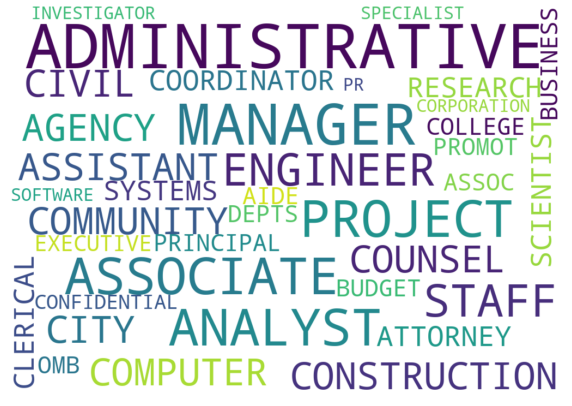

In [37]:
# Building the word_cloud
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(popular_titles.index.tolist()))

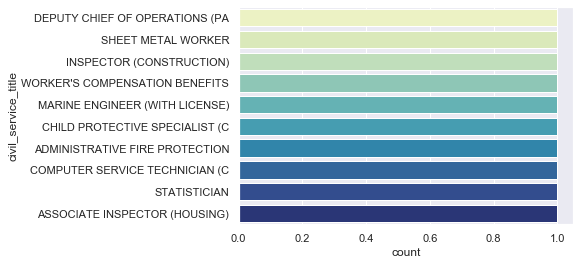

In [40]:
# Least popular job titles
sns.countplot(y='civil_service_title', data=df, order=titles_freq.iloc[-10:].index, palette=p)

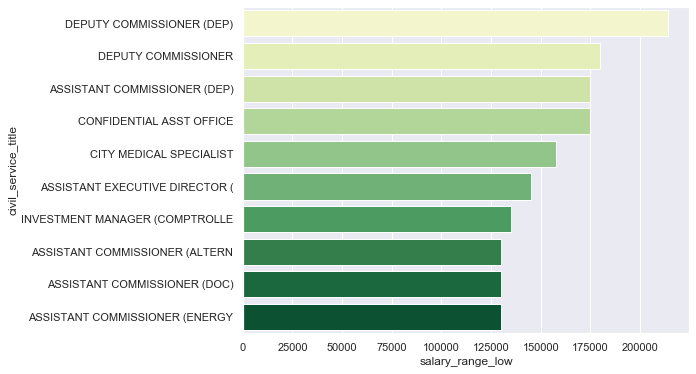

In [41]:
# Jobs with highest low salary range
salary_table = df[['civil_service_title','salary_range_low','salary_range_high']]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_low'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_low', data=jobs_highest_low_range, palette=p2)

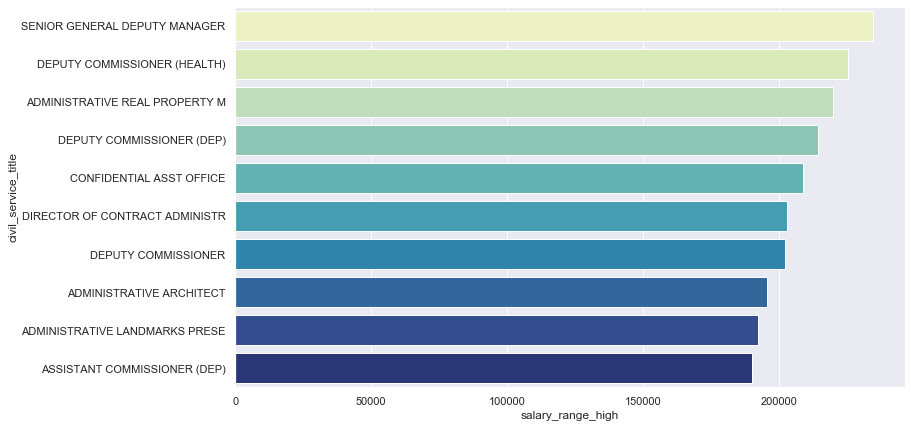

In [44]:
# Jobs with highest salary range
jobs_highest_high_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(y='civil_service_title',x='salary_range_high', data=jobs_highest_high_range,palette=p)

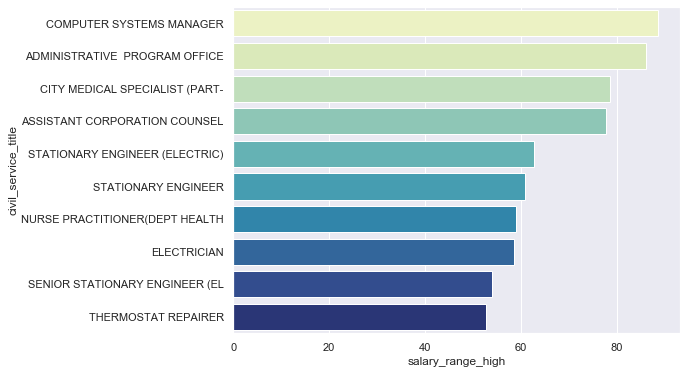

In [70]:
# Highest paying jobs on hourly basis
jobs_highest_high_range_hourly = df[df.salary_frequency=='Hourly'].groupby(['civil_service_title'])['salary_range_high'].max().nlargest(10).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range_hourly, palette=p)
plt.show()

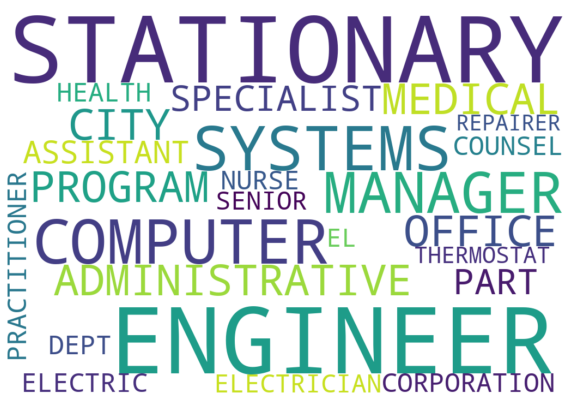

In [71]:
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(jobs_highest_high_range_hourly.civil_service_title.tolist()))

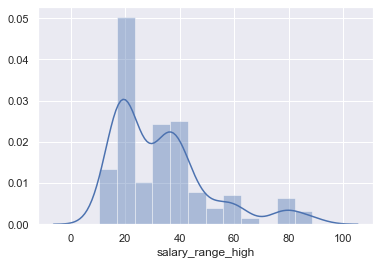

In [73]:
# Hourly job salary distribution
sns.distplot(df[df.salary_frequency=='Hourly'].salary_range_high)

In [74]:
df

,id,agency,posting_type,number_of_positions,business_title,civil_service_title,title_code_number,level,job_category,full-time/part-time,...,minimum_requirements,preferred_skills,additional_info,to_apply,shift,work_location_1,residency_requirement,posting_date,posting_updated,process_date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,426214,HOUSING PRESERVATION & DVLPMNT,External,1,Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,34202,2,"Engineering, Architecture, & Planning",F,...,1. A four-year high school diploma or its educ...,"1.\tThorough knowledge of City, State and Fede...",NaN,Apply Online.,NaN,100 Gold Street,New York City Residency is not required for th...,2019-12-16T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2942,426214,HOUSING PRESERVATION & DVLPMNT,Internal,1,Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,34202,2,"Engineering, Architecture, & Planning",F,...,1. A four-year high school diploma or its educ...,"1.\tThorough knowledge of City, State and Fede...",NaN,Apply Online.,NaN,100 Gold Street,New York City Residency is not required for th...,2019-12-16T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2943,426223,HOUSING PRESERVATION & DVLPMNT,Internal,1,Conversion Coordinator,COMMUNITY COORDINATOR,56058,0,Building Operations & Maintenance,F,...,1. A baccalaureate degree from an accredited c...,Strong preference for candidates who possess: ...,NaN,Apply Online.,NaN,100 Gold Street,New York City residency is generally required ...,2019-12-16T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2944,426223,HOUSING PRESERVATION & DVLPMNT,External,1,Conversion Coordinator,COMMUNITY COORDINATOR,56058,0,Building Operations & Maintenance,F,...,1. A baccalaureate degree from an accredited c...,Strong preference for candidates who possess: ...,NaN,Apply Online.,NaN,100 Gold Street,New York City residency is gene

In [82]:
# Popular work units
work_units_df = df.work_unit.value_counts().rename_axis('workunits').reset_index(name='count').head(10)
work_units_df

,workunits,count
0,Executive Management,56
1,Central Brookly City Operation,36
2,Law Department,32
3,Administration,31
4,Citywide Cybersecurity,29
5,Default,28
6,Green Infrastructure,25
7,W S/Connections Permitting,25
8,Dept of Environment Protection,24
9,Information Technology,24


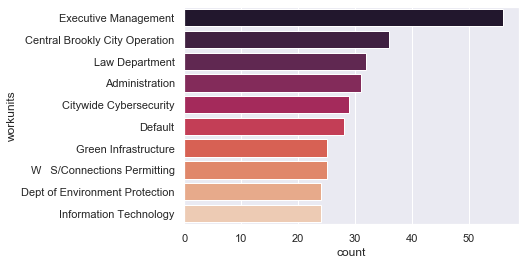

In [85]:
sns.barplot(y='workunits', x='count', data=work_units_df, palette='rocket')

In [105]:
counter =  Counter(key_words)
common = [x for x in counter.most_common(40)]
common

[('city', 6460),
 ('new', 5667),
 ('work', 4165),
 ('water', 4142),
 ('management', 3736),
 ('york', 3574),
 ('department', 3333),
 ('projects', 3313),
 ('project', 3312),
 ('program', 3286),
 ('agency', 3137),
 ('staff', 3112),
 ('data', 2952),
 ('support', 2856),
 ('development', 2831),
 ('including', 2819),
 ('services', 2772),
 ('responsible', 2770),
 ('office', 2711),
 ('construction', 2607),
 ('public', 2547),
 ('dep', 2419),
 ('design', 2417),
 ('wastewater', 2389),
 ('health', 2387),
 ('include', 2363),
 ('ensure', 2321),
 ('system', 2320),
 ('candidate', 2314),
 ('operations', 2212),
 ('bureau', 2170),
 ('division', 2153),
 ('reports', 2144),
 ('quality', 2073),
 ('nyc', 2070),
 ('review', 2034),
 ('provide', 2005),
 ('planning', 1992),
 ('related', 1967),
 ('agencies', 1949)]

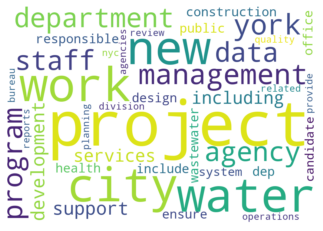

In [99]:
# most common key_words in job descriptions
key_words = []
df['job_description'].apply(parse_keywords,l=key_words)
counter =  Counter(key_words)
common = [x[0] for x in counter.most_common(40)]
plot_wordcloud(' '.join(common))

In [106]:
popular_categories = df.job_category.value_counts()[:5]
popular_categories

Engineering, Architecture, & Planning        504
Technology, Data & Innovation                313
Legal Affairs                                226
Public Safety, Inspections, & Enforcement    182
Building Operations & Maintenance            181
Name: job_category, dtype: int64

In [114]:
for (i, j) in enumerate(popular_categories.index):
    print(i, j)

0 Engineering, Architecture, & Planning
1 Technology, Data & Innovation
2 Legal Affairs
3 Public Safety, Inspections, & Enforcement
4 Building Operations & Maintenance


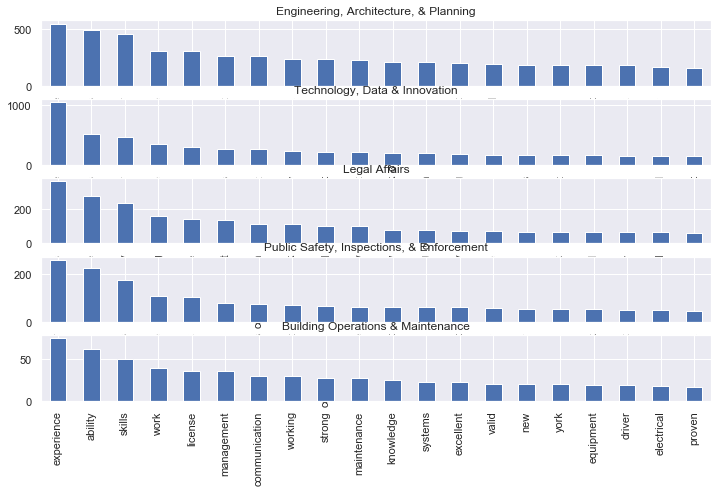

In [142]:

fig, ax = plt.subplots(5, figsize=(12,7))
for (i, j) in enumerate(popular_categories.index):
    preferred_skills(popular_categories.index[i]).plot(title=str(j), kind='bar', ax=ax[i])